In [1]:
from sympy import init_printing; init_printing()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display all expression in one cell instead of the last one

## Initialization of Variables

In [2]:
from sympy.abc import x
from sympy import integrate, Eq, symbols, Array, Function
from sinupy.algebra.tensor import cross
E_x, E_y, E_z = symbols("E_x, E_y, E_z", real=True); E = Array([E_x, E_y, E_z]) # Array([E_x, E_y, E_z]) or Array([E_x, 0, 0])
B_x, B_y, B_z = symbols("B_x, B_y, B_z", positive=True); B = Array([0, 0, B_z]) # Array([B_x, B_y, B_z]) or Array([0, 0, B_z])
t = symbols("t", real=True)
E; B; t
r_x, r_y, r_z = [f(t) for f in symbols("r_x, r_y, r_z", real=True, cls=Function)]; r = Array([r_x, r_y, r_z])
v_x, v_y, v_z = [f(t) for f in symbols("v_x, v_y, v_z", real=True, cls=Function)]; v = Array([v_x, v_y, v_z])

/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: Matpl

[Eₓ  E_y  E_z]

[0  0  B_z]

## Utility Functions

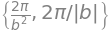

In [3]:
def divide_Array_Eq(eq):
    from sympy import Eq
    assert(eq.lhs.shape == eq.rhs.shape)
    eq_shape = eq.lhs.shape
    arr_order = len(eq_shape) 
    if arr_order > 1: # Not yet tested for high order tensor
        eq_list = []
        for i in range(eq_shape[0]):
            eq_list.append(
                divide_Array_Eq(Eq(eq.lhs[i], eq.rhs[i]))
            )
        return eq_list
    elif arr_order == 1:
        return [Eq(eq.lhs[i], eq.rhs[i]) for i in range(eq_shape[0])]
    else:# arr_order == 0
        return eq

    
def find_trig_period(expr, var):
#     from collections.abc import Iterable
#     if isinstance(var, Iterable):
#         return {find_trig_omega(expr, a_var) for a_var in var}
    from sympy.functions.elementary.trigonometric import TrigonometricFunction
    if isinstance(expr, TrigonometricFunction):
        try:
            return {expr.period(symbol=var)}
        except:
            return set()
    else:
        periods = [find_trig_period(sub_expr, var) for sub_expr in expr.args]
        return set().union(*periods)
    
def pick_min_period(expr, t):
    Ts = find_trig_period(expr, t)
    if len(Ts) == 0:
        raise ValueError("The expression does not contain Trigonometric functions, please decide the T parameter manually.")
    try:
        return min(Ts)
    except TypeError: # If we can not decide which period is the min one, a random one is chosen.
        return next(iter(Ts))
    
def time_average_of_TrigFunc(expr, t, method="Integrate_Then_Average", T=None):
    
    if method=="Integrate_Then_Average":
        from sympy import integrate
        
        if T is None:
            T = pick_min_period(expr, t)
        return integrate(expr, (t, 0, T)) / T
#     elif method=="Expand_Multiple_Angle_Then_Subs":
#         raise NotImplementedError(f"{__name__} not yet implemented for the method '{method}'.")
    else:
        raise ValueError(f"The `method` parameter can only be 'Integrate_Then_Average' right now.")

if __name__ == '__main__': # Code for test
    from sympy import sin, sinh, pi, symbols
    a = symbols("a", positive=True)
    b, t = symbols("b, t", real=True)
    find_trig_period(sin((b**2)*t)+sin(b*t), t)

## Set up the Newton Second Law Equation (ode system)

In [4]:
import sympy.solvers.ode as ode

Newton2 = Eq(E + cross(v, B), v.diff(t) ); Newton2
diff_r_is_v = Eq(r.diff(t), v); diff_r_is_v

                                           ⎡d          d           d         ⎤
[B_z⋅v_y(t) + Eₓ  -B_z⋅vₓ(t) + E_y  E_z] = ⎢──(vₓ(t))  ──(v_y(t))  ──(v_z(t))⎥
                                           ⎣dt         dt          dt        ⎦

⎡d          d           d         ⎤                          
⎢──(rₓ(t))  ──(r_y(t))  ──(r_z(t))⎥ = [vₓ(t)  v_y(t)  v_z(t)]
⎣dt         dt          dt        ⎦                          

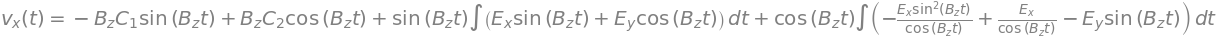

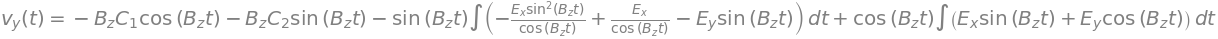

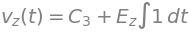

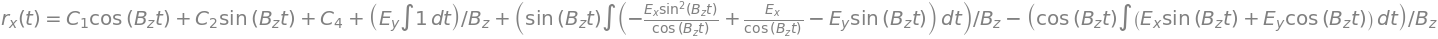

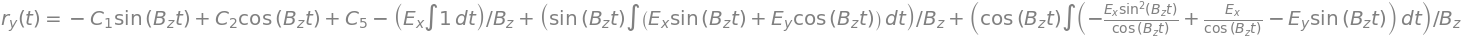

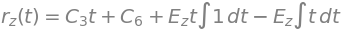

In [14]:
from sympy import simplify, sqrt
# v_sol = ode.systems.dsolve_system(
#     divide_Array_Eq(Newton2))
# for i in range(3): v_sol[0][i]
# for i in range(3): v_sol[0][i].simplify()

v_r_sol = ode.systems.dsolve_system(
    [*divide_Array_Eq(Newton2),
     *divide_Array_Eq(diff_r_is_v)])
for comp_sol in v_r_sol[0]: comp_sol
v_r_sol[0] = [comp_sol.simplify() for comp_sol in v_r_sol[0]]
for comp_sol in v_r_sol[0]: comp_sol

### Time Averaging

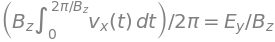

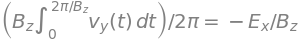

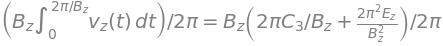

The above formulas might look too cumbersome, let's simplify them.


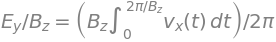

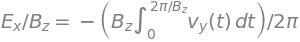

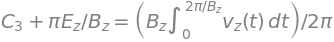

In [16]:
from sympy import simplify, trigsimp, refine
T = pick_min_period(v_r_sol[0][0].rhs, t)
t_avg_EqSol = lambda eq: Eq(
    time_average_of_TrigFunc(eq.lhs, t, T=T),
    time_average_of_TrigFunc(eq.rhs, t, T=T))

t_avg_EqSol(v_r_sol[0][0])
t_avg_EqSol(v_r_sol[0][1])
t_avg_EqSol(v_r_sol[0][2])
print("The above formulas might look too cumbersome, let's simplify them.")
refine(trigsimp(t_avg_EqSol(v_r_sol[0][0]).simplify(), method="fu"))
refine(trigsimp(t_avg_EqSol(v_r_sol[0][1]).simplify(), method="fu"))
from sympy import Q, refine
# refine(trigsimp(t_avg_EqSol(v_r_sol[0][0]).simplify(), method="fu"), Q.positive(B_z))
# refine(trigsimp(t_avg_EqSol(v_r_sol[0][1]).simplify(), method="fu"), Q.positive(B_z))
t_avg_EqSol(v_r_sol[0][2]).simplify()

In [15]:
from sympy import Symbol
Symbol("<^{a} a_{a} >", real=True)

In [18]:
from sympy.abc import _clash1
_clash1

{'O': O, 'Q': Q, 'N': N, 'I': I, 'E': E, 'S': S}

In [26]:
from sympy.abc import C, O, S,I,N,E,

In [27]:
from sympy import exp, pi
E**(I* pi)

In [1]:
from sympy import init_printing; init_printing()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display all expression in one cell instead of the last one

In [2]:
from sympy import integrate, Eq, symbols, Array, Function
from sympy import sin, cos, sqrt
from sinupy.algebra.tensor import cross

t, x, delta, a_0 = symbols("t, x, delta, a_0", real=True)
r_x, r_y, r_z = symbols("r_x, r_y, r_z", real=True, cls=Function); r = Array([r_x(t), r_y(t), r_z(t)])
p_x, p_y, p_z = symbols("p_x, p_y, p_z", real=True, cls=Function); p = Array([p_x(t), p_y(t), p_z(t)])
phi = symbols("phi", real=True, cls=Function)
A_x, A_y, A_z = symbols("A_x, A_y, A_z", real=True, cls=Function); # A = Array([0, A_y, A_z]) # Array([A_x, A_y, A_z]) or Array([0, A_y, A_z])

In [3]:
A = Array([
    0,
    delta* a_0 * cos(phi(t, x)),
    sqrt(1 - delta**2) * a_0 * sin(phi(t, x))
]).subs(phi(t, x), t - x)

In [4]:
phi(t, x).diff(t)
phi(t, x).subs(phi(t, x), t-x).diff(t)

/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: Matpl

In [6]:
E = -A.diff(t).simplify()
B = Array([0, -A[2].diff(x), A[1].diff(x)]).simplify()
E; B

⎡                           ________           ⎤
⎢                          ╱      2            ⎥
⎣0  a₀⋅δ⋅sin(t - x)  -a₀⋅╲╱  1 - δ  ⋅cos(t - x)⎦

⎡         ________                            ⎤
⎢        ╱      2                             ⎥
⎣0  a₀⋅╲╱  1 - δ  ⋅cos(t - x)  a₀⋅δ⋅sin(t - x)⎦

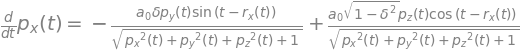

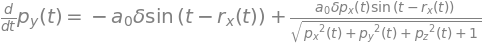

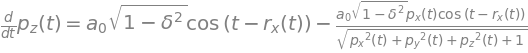

In [9]:
Newton2 = Eq(p.diff(t), -( E.subs(x, r[0]) +  cross (p/sqrt(1 + p[0]**2 + p[1]**2 + p[2]**2), B.subs(x, r[0])) ) )
Newton2_list = divide_Array_Eq(Newton2)
for i in range(3): Newton2_list[i]

In [10]:
import sympy.solvers.ode as ode
p_sol = ode.systems.dsolve_system(Newton2_list)


NotImplementedError: 
The system of ODEs passed cannot be solved by dsolve_system.

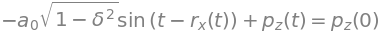

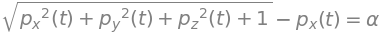

In [15]:
Newton2_list = [Eq(
    p[i] - A[i].subs(x, r[0]),
    p[i].subs(t, 0)) for i in [1, 2]]
alpha = symbols("alpha", real=True)
Newton2_list.append(Eq(
    sqrt(1 + p[0]**2 + p[1]**2 + p[2]**2)-p[0],
    alpha))
for i in range(3): Newton2_list[i]

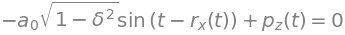

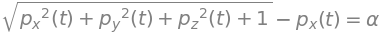

In [18]:
# Set the p_y(0) = p_z(0) = 0 
Newton2_list = [Eq(
    p[i] - A[i].subs(x, r[0]),
    0) for i in [1, 2]]
alpha = symbols("alpha", real=True)
Newton2_list.append(Eq(
    sqrt(1 + p[0]**2 + p[1]**2 + p[2]**2)-p[0],
    alpha))
for i in range(3): Newton2_list[i]

In [36]:
from sympy import solve
p_sol = solve(Newton2_list, p[0]); p_sol

Suppose the electron initially at rest, $p_x(0)=p_y(0)=p_z(0)=0$ when $t=0$. Therefore $\gamma(0)=\sqrt{1+p^2(t=0)/m^2 c^2}=1$ and $\alpha=1$.

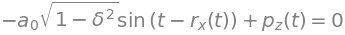

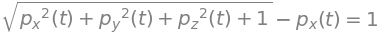

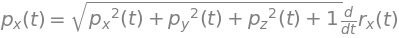

In [55]:
import sympy.solvers.ode as ode
Newton2_list_init_rest = [eq.subs(alpha, 1) for eq in Newton2_list]
Newton2_list_init_rest.append(Eq(p[0], sqrt(1+ p[0]**2 + p[1]**2 + p[2]**2) * r[0].diff(t)))

for eq in Newton2_list_init_rest: eq
funcs = [p[i] for i in range(3)]
funcs.append(r[0])

In [53]:
import plotly

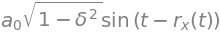

In [50]:
p_sol[0][p[0]] = p_sol[0][p[0]]\
    .subs(p[1], a_0 * delta * cos(t - r[0]))\
    .subs(p[2], a_0 * sqrt(1 - delta**2) * sin(t - r[0]))\
    .subs(alpha, 1).simplify(); 
from sympy.simplify import collect
p_sol[0][p[0]] = collect(p_sol[0][p[0]], cos(2*t - 2*r[0]))
p_sol[0][p[1]] = a_0 * delta * cos(t - r[0])
p_sol[0][p[2]] = a_0 * sqrt(1 - delta**2) * sin(t - r[0])
for i in range(3): p_sol[0][p[i]]

In [34]:
p_sol = ode.systems.dsolve_system(
    Newton2_list_init_rest, 
    funcs=funcs, t=t, 
    ics={p[0].subs(t,0): 0, p[1].subs(t,0): 0, p[2].subs(t,0): 0, r[0].subs(t,0): 0})

ValueError: dsolve() and classify_sysode() work with functions of one variable only, not t

## The Electron Trace Interacting with a Beam of Laser 

In [13]:
from scipy.integrate import ode as sciode
import numpy as np

x0, t0 = 0.0, 0.0
a_0, delta = 1.0, 0.5
def f(t, x, a_0, delta):
    numerator = 0.25 * a_0**2 * ( 1 + (2*delta**2-1) * np.cos(2*t-2*x))
    denominator = 1.0 + 0.25 * a_0**2 * ( 1 + (2*delta**2 - 1) * np.cos(2*t-2*x) )
    return numerator / denominator

In [14]:
r = sciode(f).set_integrator('vode', method='bdf')
r.set_initial_value(x0, t0).set_f_params(a_0, delta)
t1 = 50
dt = 0.05
num_of_t = int(t1 / dt); num_of_t
x_arr = np.empty((num_of_t)); x_arr[0] = x0
t_arr = np.arange(num_of_t) * dt

i = 0
while r.successful() and i < num_of_t-1:
    i += 1
    x_arr[i] = r.integrate(r.t+dt)
    
y_arr = delta * a_0 * np.sin(t_arr - x_arr)
z_arr =-np.sqrt(1-delta**2) * a_0 * np.cos(t_arr - x_arr)

x_rest_arr = x_arr - a_0**2 / 4 * (t_arr-x_arr)
px_arr = a_0**2 / 4 * ( 1 + (2* delta**2 - 1) * np.cos(2*t_arr-2*x_arr))
py_arr = delta * a_0 * np.cos(t_arr-x_arr)
pz_arr = a_0 * np.sqrt(1 - delta**2) * np.sin(t_arr-x_arr)
p_arr = np.sqrt(px_arr**2 + py_arr**2 + pz_arr**2)

In [15]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter3d(
    x=x_arr, y=y_arr, z=z_arr,
    marker=dict(
        size=4,
        color=p_arr,
        colorscale='Viridis',
    ),
    line=dict(
        color=p_arr,
        width=2
    )
))

fig.update_layout(
    scene=dict(
        aspectratio = dict( x=1, y=1, z=1.0 ),
        aspectmode = 'data'))
fig.show()


In [16]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter3d(
    x=x_rest_arr, y=y_arr, z=z_arr,
    marker=dict(
        size=4,
        color=p_arr,
        colorscale='Viridis',
    ),
    line=dict(
        color=p_arr,
        width=2
    )
))

fig.update_layout(
    scene=dict(
        aspectratio = dict( x=1, y=1, z=1.0 ),
        aspectmode = 'data'))
fig.show()


## Fast Lambdify by Cupy 

In [51]:
import cupy as cp

## Bugs to be reported to Sympy

In [2]:
from sympy import sin, sinh, pi, symbols
a = symbols("a", positive=True)
b, t = symbols("b, t", real=True)
sin(a*t).period(t)

2*pi/a

In [3]:
sin(-a*t).period(t) # AttributeError: 'Mul' object has no attribute 'period'
sin((-1)*a*t).period(t) # AttributeError: 'Mul' object has no attribute 'period'

AttributeError: 'Mul' object has no attribute 'period'

In [4]:
sin(b*t).period(t)

2*pi/Abs(b)